## _EDA Notebook:_

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [4]:
cancer = pd.read_csv('../Data/cleaned_cr')

In [20]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
#Looking at the class balances. Will use SMOTE oversampling to balnce classes later
cancer.diagnosis.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [7]:
#Will map positive and negative classes for visualizations and later modeling
cancer['diagnosis'] = cancer['diagnosis'].map({'B' : 0, 'M' : 1})

### _EDA:_

For the eda, first I will look at distribustions of all our variables and then I will pick some random variables to see how they relate to our target variable (diagnosis).

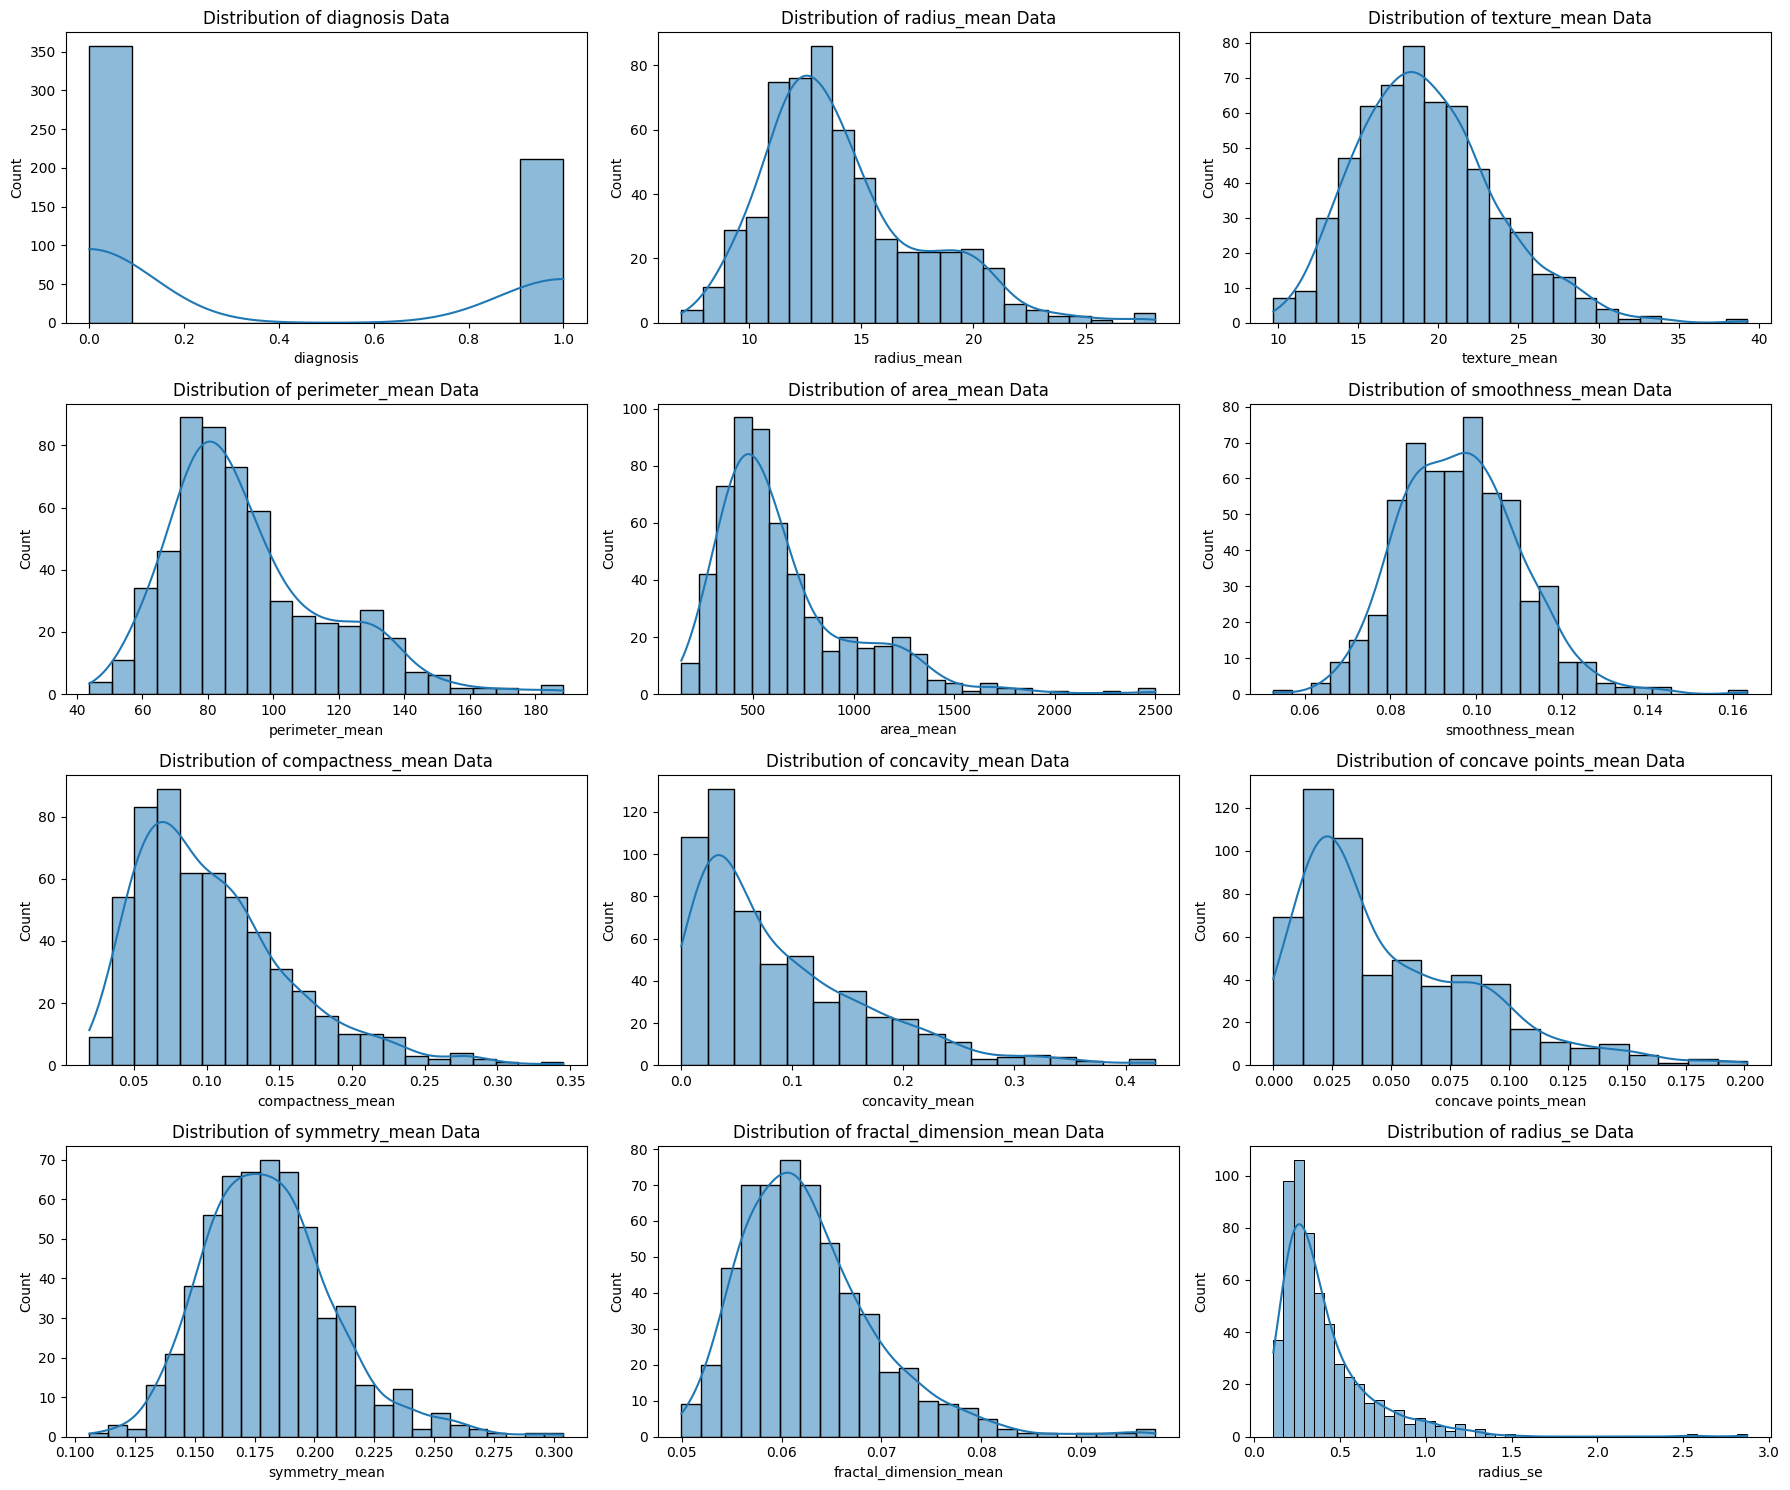

In [9]:
plt.figure(figsize=(18,15))
for i,col in enumerate(cancer.columns[:12],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(cancer[col],kde=True)
    plt.tight_layout()
    plt.plot()
  

In [14]:
fig = px.histogram(cancer, x="radius_mean", color="diagnosis", hover_data=cancer.columns, 
                   title = 'Radius Mean and Type of Tumor: Malignant = 1 Benign = 0 ', marginal = 'violin')
fig.show()

In [18]:
fig = px.histogram(cancer, x="radius_worst", color="diagnosis", hover_data=cancer.columns, 
                   title = 'Radius Worst and Type of Tumor: Malignant = 1 Benign = 0 ', marginal = 'violin')
fig.show()

In [19]:
fig = px.histogram(cancer, x="area_mean", color="diagnosis", hover_data=cancer.columns, 
                   title = 'Area Mean and Type of Tumor: Malignant = 1 Benign = 0 ', marginal = 'violin')
fig.show()

In [22]:
fig = px.histogram(cancer, x="perimeter_mean", color="diagnosis", hover_data=cancer.columns, 
                   title = 'Perimeter Mean and Type of Tumor: Malignant = 1 Benign = 0 ', marginal = 'violin')
fig.show()

In [24]:
fig = px.histogram(cancer, x="symmetry_mean", color="diagnosis", hover_data=cancer.columns, 
                   title = 'Symmetry Mean and Type of Tumor: Malignant = 1 Benign = 0 ', marginal = 'violin')
fig.show()

After visualizing multiple variables vs the presence of a malignant or benign tumors, it seems to be that the larger the tumor the greater chance that it has to be malignant. This coincides with what I already know about cancer. No surprise there. Most malignant tumors take years to grow large enough for imaging to be able to detect them. Usually by that time, depending on type, aggresive methods are needed in order to save the patient. This is why predictive modeling is needed in order to not only classify patients in different risk categories for cancer, but to help classify malignant vs benign tumors as early as possible based on data fed in to the models. 

In [46]:
cancer.to_csv('../Data/model_cancer')